# Linear Regression

In [1]:
from si.data import Dataset, summary,StandardScaler
from si.supervised import LinearRegression
import numpy as np
import os

In [2]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/hearts.data')
dataset = Dataset.from_data(filename, labeled=True)
StandardScaler().fit_transform(dataset,inline=True)
summary(dataset)

,A,B,C,D,E,F,G,H,I,J,K,L,M,y
mean,3.651400e-16,-9.539694e-17,4.276415e-17,5.394862e-16,-2.500058e-16,6.908054e-17,8.223874e-17,1.644775e-17,5.098802e-17,7.204114e-16,-1.266477e-16,-6.579099e-17,7.565964e-17,0.444444
var,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.246914
min,-2.797275e+00,-1.450327e+00,-2.292532e+00,-2.094649e+00,-2.396942e+00,-4.170288e-01,-1.026285e+00,-3.402609e+00,-7.012223e-01,-9.185652e-01,-9.542343e-01,-7.115349e-01,-8.757058e-01,0.000000
max,2.481986e+00,6.894997e-01,8.709276e-01,3.850888e+00,6.093004e+00,2.397916e+00,9.816636e-01,2.262800e+00,1.426081e+00,4.505343e+00,2.307073e+00,2.472682e+00,1.189277e+00,1.000000


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1]==1:
    plt.scatter(dataset.X, dataset.y)
    plt.show()


## Linear Regression without regularization using closed form 

In [4]:
lr = LinearRegression(ldb=0)
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [ 0.44444444 -0.01695213  0.07450927  0.08901536  0.0365427   0.0310992
 -0.02876549  0.03925668 -0.06292523  0.05416595  0.04990739  0.02920038
  0.12734696  0.11518954]


In [5]:
idx = 3
x = dataset.X[idx]
print("x = ",x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ",y_pred)
print("y_true = ", y)


x =  [-1.14750596  0.6894997   0.87092765 -1.19720918 -1.02071753 -0.41702883
  0.98166365  1.18161506 -0.7012223  -0.91856516 -0.95423434  0.34987077
 -0.87570581]
y_pred =  0.32547717181757513
y_true =  1.0


In [6]:
lr.cost()

0.05614225302212008

In [7]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.y)
    plt.plot(lr.X[:,1], np.dot(lr.X, lr.theta), '-', color='red')
    plt.show()


## Linear Regression using gradient descent

In [8]:
lr = LinearRegression(ldb=0,gd=True,epochs=50000)
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [ 0.44444444 -0.01695213  0.07450927  0.08901536  0.0365427   0.0310992
 -0.02876549  0.03925668 -0.06292523  0.05416595  0.04990739  0.02920038
  0.12734696  0.11518954]


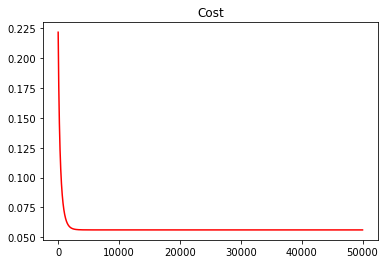

In [9]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [10]:
lr.cost()

0.05614225302212007

# Linear Regression with Regularization

In [11]:
lr = LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [ 0.44444444 -0.01658639  0.0743626   0.08886214  0.03635081  0.03099407
 -0.0286115   0.0391624  -0.06274796  0.05423135  0.04997226  0.02922547
  0.12689304  0.11495584]


In [12]:
idx = 1
x = dataset.X[idx]
print("x = ", x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [ 0.2822938  -1.45032695  0.87092765 -0.63630951  2.02248236 -0.41702883
 -1.02628472  0.57615147  1.4260813  -0.39367078 -0.95423434 -0.71153494
 -0.87570581]
y_pred =  0.2232683435069513
y_true =  0.0


In [13]:
lr.cost()

0.05614250670273697

# Logistic Regression without regularization

In [14]:
from si.supervised import LogisticRegression
import pandas as pd

In [15]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")
y = [int(x != 'Iris-setosa') for x in iris.y]
dataset = Dataset(iris.X[:,:2],np.array(y))
summary(dataset)

,A,B,y
mean,5.843333,3.054000,0.666667
var,0.681122,0.186751,0.222222
min,4.300000,2.000000,0.000000
max,7.900000,4.400000,1.000000


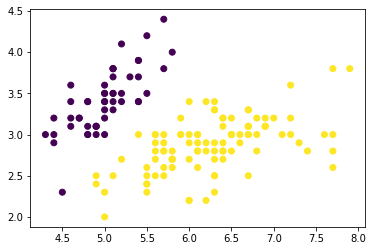

In [16]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
plt.show()

In [17]:
logreg = LogisticRegression(lbd=0, epochs=100000)

In [18]:
logreg.fit(dataset)
logreg.theta

array([-14.5742557 ,   9.38804814, -11.67863334])

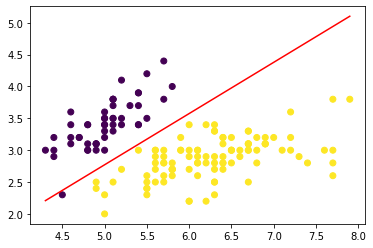

In [19]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

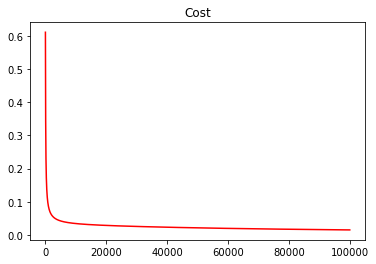

In [20]:
plt.plot(list(logreg.history.keys()), [ y[1] for y in logreg.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [21]:
logreg.cost()

0.015303769863203613

In [22]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Logistic Regression with L2 regularization

In [23]:
logreg = LogisticRegression()
logreg.fit(dataset)
logreg.theta

array([-4.34883596,  2.88946771, -3.57253988])

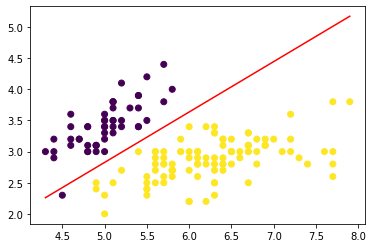

In [24]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [25]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Cross-validation

In [26]:
from si.util import CrossValidationScore

In [27]:
logreg = LogisticRegression(epochs=1000)
cv = CrossValidationScore(logreg,dataset,cv=5)
cv.run()
cv.toDataframe()

,Train Scores,Test Scores
0,0.201250,0.418939
1,0.203671,0.415312
2,0.198909,0.432771
3,0.201065,0.423999
4,0.203591,0.412542


In [28]:
logreg = LogisticRegression(epochs=500, lbd=0.5)
cv = CrossValidationScore(logreg, dataset, cv=4)
cv.run()
cv.toDataframe()

,Train Scores,Test Scores
0,0.171518,0.280129
1,0.177422,0.265093
2,0.177624,0.267040
3,0.176511,0.264525


# Grid Search with Cross-Validation

In [29]:
from si.util import GridSearchCV

In [30]:
parameters ={'epochs':[100,200,400,800,1000],'lbd':[0,0.2,0.4,0.6]}
gs = GridSearchCV(logreg, dataset, parameters, cv=3, split=0.8)
gs.run()
df = gs.toDataframe()

In [31]:
df.sort_values(by=['CV_1 train','CV_1 test'])

,epochs,lbd,CV_1 train,CV_1 test,CV_2 train,CV_2 test,CV_3 train,CV_3 test
12,800,0.0,0.084359,0.145378,0.103543,0.066244,0.090983,0.123245
16,1000,0.0,0.090737,0.060439,0.083785,0.099277,0.092707,0.061331
17,1000,0.2,0.122139,0.170454,0.123773,0.164406,0.123691,0.172299
13,800,0.2,0.129217,0.171957,0.123928,0.195206,0.133127,0.153401
18,1000,0.4,0.140837,0.283114,0.150480,0.244201,0.145613,0.263735
14,800,0.4,0.153894,0.240927,0.153737,0.241500,0.156339,0.227415
8,400,0.0,0.155443,0.127137,0.151031,0.111153,0.149174,0.145692
15,800,0.6,0.166591,0.332081,0.175472,0.295099,0.162987,0.347951
9,400,0.2,0.169759,0.166320,0.167007,0.186222,0.175518,0.148807
19,1000,0.6,0.170714,0.314025,0.170123,0.315624,0.164751,0.336862
